In [1]:
import model_function as mf

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pandas as pd
import psycopg2 as pg2

In [3]:
df = pd.read_csv('/data/npi_2013_clean1.csv')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
X_train, X_test = mf.make_train_test_dataset(df)

In [5]:
keep_cols = ['bene_count'
             , 'total_claim_count'
             , 'total_drug_cost'
             , 'total_day_supply'
             , 'brand_claim_count'
             , 'brand_claim_cost'
             , 'generic_claim_count'
             , 'generic_claim_cost'
             , 'other_claim_count'
             , 'other_claim_cost'
             , 'mapd_claim_count'
             , 'mapd_claim_cost'
             , 'pdp_claim_count'
             , 'pdp_claim_cost'
             , 'lis_claim_count'
             , 'lis_claim_cost'
             , 'nonlis_claim_count'
             , 'nonlis_claim_cost'
            ]

In [6]:
mod_if = mf.fit_model(X_train, keep_cols)

[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   40.5s finished


In [13]:
conn = pg2.connect(dbname='medicare', user='postgres')
query = '''
        SELECT n.npi
            , indict.first_name
            , indict.last_name
            , indict.npi_status
            , indict.year_start
            , indict.year_end
        FROM indictments_2013 indict
            , npi_name n
        WHERE lower(indict.first_name) = lower(n.providerfirstname)
        AND lower(indict.last_name) = lower(n.providerlastnamelegalname)
        ;
        '''

In [19]:
# Tried running npi match with state as well (first name, last name, state), 
# but it really restricts the data set. Look into this.
# Lot more npi's, but maybe they're not really indicted?
# Might throw off validation

In [14]:
df_labels = pd.read_sql_query(query, conn)

In [15]:
test_df = mf.prediction(X_test, keep_cols, mod_if)

In [16]:
test_df = mf.check_labels(df_labels, test_df, keep_cols)

In [20]:
test_df[test_df['indicted']==True]

,Unnamed: 0,npi,last_name,first_name,entity_code,provider_zip,provider_city,specialty_desc,bene_count,total_claim_count,...,nonlis_claim_cost,brand_claim_cost_avg,generic_claim_cost_avg,other_claim_cost_avg,mapd_claim_cost_avg,pdp_claim_cost_avg,lis_claim_cost_avg,nonlis_claim_cost_avg,prediction,indicted
462802,644258,1306118393,MORENO,JORGE,I,906404268,MONTEBELLO,General Practice,5.5,37,...,3145.610000,162.148990,19.399925,21.653271,39.874235,60.528605,60.136808,42.031533,0.326020,1
497827,726711,1306953286,PEREZ,JESUS,I,752525618,DALLAS,Emergency Medicine,133.0,246,...,2066.620000,167.351033,17.138019,26.098559,37.195362,43.327400,43.659584,37.853630,0.334727,1
220844,617590,1871667832,MENDOZA,MARY,I,955679509,SMITH RIVER,Dentist,17.0,28,...,67.090000,158.753969,9.836693,11.079918,13.122738,14.372785,16.870624,13.246902,0.318857,1
522001,479527,1750391298,KHAN,TARIQ,I,212155216,BALTIMORE,General Surgery,195.0,258,...,1862.500000,214.344588,22.366400,33.475198,50.298379,62.034269,65.986955,51.478635,0.347308,1
827348,49414,1629366232,BAILEY,JASON,I,181045656,ALLENTOWN,Podiatry,14.0,19,...,236.900275,165.712472,28.087554,69.782478,42.709319,51.912472,53.179145,43.072777,0.320822,1
968951,479523,1346456092,KHAN,TARIQ,I,75203,DALLAS,Vascular Surgery,25.0,140,...,416.670000,218.836021,27.621883,26.909048,40.473245,50.130440,51.007470,44.330219,0.341766,1
620119,617597,1720209661,MENDOZA,MICHAEL,I,915054809,BURBANK,Physician Assistant,65.0,90,...,208.050000,244.991003,23.392842,29.246024,63.094360,73.697529,76.825794,62.633992,0.328950,1
135825,1040784,1063749828,ZAFAR,MUHAMMAD,I,452192364,CINCINNATI,Internal Medicine,5.5,39,...,326.676678,192.936023,23.082508,29.143358,54.736709,67.127356,67.169662,59.395760,0.329366,1
233849,726709,1013935212,PEREZ,JESUS,I,347112121,CLERMONT,Dentist,16.0,21,...,72.857961,158.753969,9.836693,11.079918,13.122738,14.372785,16.870624,13.246902,0.320676,1
464480,787999,1407989031,RIVERA,LUIS,I,728,PONCE,General Practice,157.0,772,...,18522.080000,162.148990,19.399925,21.653271,39.874235,60.528605,60.136808,42.031533,0.385351,1


### PCA/Graph to visualize data

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [22]:
X_pca = test_df[keep_cols]

In [23]:
pca = PCA(n_components=3)

In [24]:
pca.fit(X_pca)

PCA(copy=True, iterated_power=4, n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.explained_variance_

array([  1.59744664e+11,   1.22580130e+10,   6.12387275e+09])

In [27]:
sum(pca.explained_variance_ratio_)

0.94831042525163578

In [50]:
X_pca_transformed = pca.fit_transform(X_pca)

In [46]:
X_pca_transformed.shape

(524691, 3)

In [56]:
xs = X_pca_transformed[:,0]
ys = X_pca_transformed[:,1]
zs = X_pca_transformed[:,2]
c = test_df['indicted']

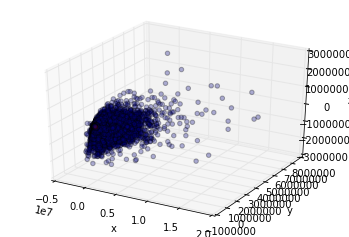

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.figure(figsize=(15,15))
ax.set_xlim(-5000000,20000000)
ax.set_ylim(-1000000,8000000)
ax.set_zlim(-3000000,3000000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(xs, ys, zs, c=c, alpha=.3)
plt.show()

In [64]:
def graph_3d(pca_vector, df):
    xs = pca_vector[:,0]
    ys = pca_vector[:,1]
    zs = pca_vector[:,2]
    c = df['indicted']

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(xs, ys, zs, c=c, alpha=.3)

    return ax

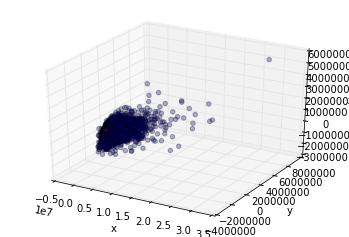

In [77]:
ax1 = graph_3d(X_pca_transformed, test_df)
ax.set_xlim(-5000000,20000000)
ax.set_ylim(-1000000,8000000)
ax.set_zlim(-3000000,3000000)
plt.show()

In [68]:
mask = test_df['indicted']==True

In [73]:
X_pca_masked = X_pca_transformed[mask]
test_df_masked = test_df[mask]

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


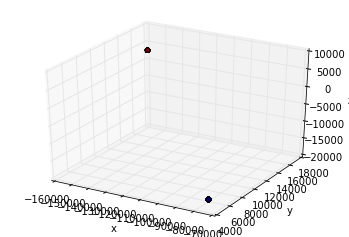

In [76]:
xs = X_pca_masked[:,0]
ys = X_pca_masked[:,1]
zs = X_pca_masked[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.set_xlim(-5000000,20000000)
#ax.set_ylim(-1000000,8000000)
#ax.set_zlim(-3000000,3000000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(xs, ys, zs, c=c, alpha=.3)
plt.show()